# Caso de Estudio: Modelo de Red Neuronal para la Predicción de Precios de Viviendas


## 1 Datos. Carga y Transformación

### 1.1 Insertamos el csv dentro de un df

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df_baleares = pd.read_csv('/content/drive/My Drive/Estudios/MasterIA/IAGen/houses_balears.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
display(df_baleares)

,ad_description,ad_last_update,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,construct_date,energetic_certif,...,m2_useful,obtention_date,orientation,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace,unfurnished
0,"Vendemos este precioso piso tipo duplex, estil...",Anuncio actualizado el 4 de abril,1,0,2,1,0,segunda mano/buen estado,NaN,en trámite,...,NaN,2019-04-08,sur,550000,0,2,0,1,1,NaN
1,"Piso en pleno centro de Santa Eulália, en buen...",más de 5 meses sin actualizar,1,0,1,1,0,segunda mano/buen estado,NaN,NaN,...,47,2019-04-08,norte,240000,0,1,0,0,0,NaN
2,Precioso piso en planta cuarta de un edificio ...,más de 5 meses sin actualizar,0,0,2,0,0,segunda mano/buen estado,NaN,no indicado,...,NaN,2019-04-08,NaN,775000,0,3,0,0,1,NaN
3,Completamente renovado por 1 año como arquitec...,más de 5 meses sin actualizar,0,0,1,1,0,segunda mano/buen estado,NaN,NaN,...,60,2019-04-08,NaN,300000,0,2,0,0,1,NaN
4,"En primera línea de mar, Dúplex de 144 m2, con...",más de 5 meses sin actualizar,1,1,2,1,0,segunda mano/buen estado,NaN,en trámite,...,144,2019-04-08,NaN,485000,0,3,0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24875,"Este apartamento, muy bien mantenido y soleado...",Anuncio actualizado el 11 de marzo,0,0,1,1,0,segunda mano/buen estado,NaN,NaN,...,NaN,2019-04-09,sur,219000,0,2,0,1,1,NaN
24876,Este proyecto único y espectacular para una vi...,Anuncio actualizado el 20 de marzo,1,1,5,1,0,segunda mano/buen estado,2019,en trámite,...,NaN,2019-04-09,NaN,12000000,0,5,1,1,1,NaN
24877,"Destacado: Magnifico adosado con dos terrazas,...",Anuncio actualizado el 7 de abril,1,0,1,1,0,segunda mano/buen estado,NaN,en trámite,...,NaN,2019-04-09,"sur, este",390000,0,2,1,1,1,NaN
24878,Maravilloso chalet ubicado en una zona tranqui...,Anuncio actualizado el 26 de febrero,0,0,3,1,0,NaN,2016,en trámite,...,270,2019-04-09,"sur, este",1950000,0,4,1,1,1,NaN


### 1.2 Limpieza datos vacios y limpieza columnas

In [ ]:
print(df_baleares.isnull().sum())

ad_description         524
ad_last_update           0
air_conditioner          0
balcony                  0
bath_num                 0
built_in_wardrobe        0
chimney                  0
condition             6676
construct_date       14566
energetic_certif      6020
floor                 8265
garage               13793
garden                   0
ground_size          24822
heating              18531
house_id                 0
house_type               0
kitchen              24822
lift                 14720
loc_city                 0
loc_district          4633
loc_full                 0
loc_neigh            13200
loc_street           21373
loc_zone                 0
m2_real                  0
m2_useful            13176
obtention_date           0
orientation          14001
price                    0
reduced_mobility         0
room_num                 0
storage_room             0
swimming_pool            0
terrace                  0
unfurnished          24822
dtype: int64


Borrar columnas innecesarias

In [ ]:
columnas_a_eliminar = ['ad_description', 'ad_last_update','ground_size', 'kitchen', 'unfurnished', 'loc_street', 'heating', 'garage', 'lift', 'm2_useful', 'orientation', 'construct_date']
#columnas_a_eliminar = ['loc_district', 'loc_neigh']

df_baleares = df_baleares.drop(columns=columnas_a_eliminar)

# Verificar que las columnas han sido eliminadas
print(df_baleares.isnull().sum())

air_conditioner         0
balcony                 0
bath_num                0
built_in_wardrobe       0
chimney                 0
condition            6676
energetic_certif     6020
floor                8265
garden                  0
house_id                0
house_type              0
loc_city                0
loc_full                0
loc_zone                0
m2_real                 0
obtention_date          0
price                   0
reduced_mobility        0
room_num                0
storage_room            0
swimming_pool           0
terrace                 0
dtype: int64


Viendo los datos vacios en floor indica que muy seguramente sean chalets. Sustuimos esos datos vacios por chalet

In [ ]:
import pandas as pd
import numpy as np #Necesario para usar np.nan

# Supongamos que tu DataFrame se llama 'df'

# Reemplazar NaN con "Chalet" en la columna 'floor'
df_baleares['floor'] = df_baleares['floor'].fillna('Chalet')

# Si quieres verificar que los NaN han sido reemplazados
# Imprimir las filas donde 'floor' era nulo (ahora debería estar vacío)
filas_nulas = df_baleares[df_baleares['floor'].isnull()]
print(filas_nulas)

#Imprimir los valores únicos de la columna floor para verificar el cambio
print(df_baleares['floor'].unique())

Empty DataFrame
Columns: [air_conditioner, balcony, bath_num, built_in_wardrobe, chimney, condition, energetic_certif, floor, garden, house_id, house_type, loc_city, loc_full, loc_zone, m2_real, obtention_date, price, reduced_mobility, room_num, storage_room, swimming_pool, terrace]
Index: []

[0 rows x 22 columns]
['planta 3ª exterior' 'planta 1ª interior' 'planta 4ª exterior'
 'planta 2ª exterior' '2 plantas' 'Chalet' 'interior' '1 planta'
 'planta 2ª interior' 'bajo exterior' 'exterior' 'planta 1ª' '3 plantas'
 'planta 1ª exterior' 'bajo interior' 'bajo' 'planta 3ª interior'
 'planta 4ª interior' 'entreplanta exterior' 'planta 7ª exterior'
 'planta 2ª' 'planta 5ª exterior' 'planta 3ª' '5 plantas' '4 plantas'
 'planta 4ª' 'planta 6ª exterior' 'floor' 'planta 5ª'
 'entreplanta interior' 'planta -2 exterior' 'planta 7ª interior'
 'planta 8ª exterior' 'planta 5ª interior' 'sótano exterior'
 'planta 10ª exterior' 'planta -1 exterior' 'planta 6ª interior'
 'planta 6ª' 'planta 7ª' '15 plan

Rellenar los datos vacios de Certificado electrico y condition

In [ ]:
import pandas as pd

# Supongamos que tu DataFrame se llama 'df'

# Imputación con la moda para 'energetic_certif'
moda_energetic_certif = df_baleares['energetic_certif'].mode()[0]
df_baleares['energetic_certif'] = df_baleares['energetic_certif'].fillna(moda_energetic_certif)

# Imputación con la moda para 'condition'
moda_condition = df_baleares['condition'].mode()[0]
df_baleares['condition'] = df_baleares['condition'].fillna(moda_condition)

# Verificar que los NaN han sido reemplazados
print(df_baleares['energetic_certif'].isnull().sum())
print(df_baleares['condition'].isnull().sum())

0
0


In [ ]:
display(df_baleares.head())

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,condition,energetic_certif,floor,garden,house_id,...,loc_full,loc_zone,m2_real,obtention_date,price,reduced_mobility,room_num,storage_room,swimming_pool,terrace
0,1,0,2,1,0,segunda mano/buen estado,en trámite,planta 3ª exterior,1,36266563,...,"Urb. Camp Furne , Distrito Jesús/Nuestra Seño...","Ibiza, Balears (Illes)",150,2019-04-08,550000,0,2,0,1,1
1,1,0,1,1,0,segunda mano/buen estado,en trámite,planta 1ª interior,0,38223244,...,"Calle del Mar, 1 bis 1D , Distrito Santa Eula...","Ibiza, Balears (Illes)",55,2019-04-08,240000,0,1,0,0,0
2,0,0,2,0,0,segunda mano/buen estado,no indicado,planta 4ª exterior,0,81803540,...,"Calle de Sant Joan, 6 , Distrito Santa Eulali...","Ibiza, Balears (Illes)",130,2019-04-08,775000,0,3,0,0,1
3,0,0,1,1,0,segunda mano/buen estado,en trámite,planta 1ª interior,1,81380167,...,"Calle des Munt Kilimanjaro, 62 , Urb. Cala Ll...","Ibiza, Balears (Illes)",70,2019-04-08,300000,0,2,0,0,1
4,1,1,2,1,0,segunda mano/buen estado,en trámite,planta 2ª exterior,1,82243761,...,"Calle Isla espalmador, 75 , Urb. La Joya , Di...","Ibiza, Balears (Illes)",150,2019-04-08,485000,0,3,0,1,1


Quitar datos incorrectos filas

In [ ]:
import pandas as pd
import numpy as np

# Borrar valores específicos en columnas específicas
columnas_a_limpiar = ['air_conditioner', 'balcony', 'built_in_wardrobe', 'chimney', 'garden']
for columna in columnas_a_limpiar:
    df_baleares[columna] = df_baleares[columna].replace(columna, np.nan)

# Limpiar 'bath_num'
df_baleares['bath_num'] = df_baleares['bath_num'].replace('bath_num', np.nan)
df_baleares['bath_num'] = df_baleares['bath_num'].replace('sin baños', 0)

# Verificar los cambios (opcional)
for columna in ['air_conditioner', 'balcony', 'bath_num', 'built_in_wardrobe', 'chimney', 'garden']:
    print(f"Valores únicos en {columna}: {df_baleares[columna].unique()}")

Valores únicos en air_conditioner: ['1' '0' nan]
Valores únicos en balcony: ['0' '1' nan]
Valores únicos en bath_num: ['2' '1' '3' '5' '4' '6' '9' '11' '7' '14' '8' '13' '12' '10' nan 0 '20'
 '84' '16' '15' '19' '23' '32']
Valores únicos en built_in_wardrobe: ['1' '0' nan]
Valores únicos en chimney: ['0' '1' nan]
Valores únicos en garden: ['1' '0' nan]


In [ ]:
import pandas as pd

# Reemplazar "sin habitación" con 0
df_baleares['room_num'] = df_baleares['room_num'].replace('sin habitación', 0)

# Si quieres verificar el cambio (opcional)
print(df_baleares['room_num'].unique())

['2' '1' '3' '4' '7' '6' '5' 0 '9' '8' '10' '14' '12' '11' '15' 'room_num'
 '16' '13' '36' '84' '18' '20' '22' '17' '65' '24' '23' '32']


## 1.3 Frequency Encoding

In [ ]:
import pandas as pd

# Supongamos que tu DataFrame se llama 'df'
columnas_a_codificar = ['condition', 'energetic_certif', 'loc_full', 'loc_zone', 'obtention_date', 'floor', 'loc_city', 'house_type']

for columna in columnas_a_codificar:
    # Calcular la frecuencia de cada valor en la columna
    freq = df_baleares[columna].value_counts(normalize=True)

    # Mapear las frecuencias a una nueva columna
    df_baleares[columna + '_freq'] = df_baleares[columna].map(freq)

    # Eliminar la columna original
    df_baleares = df_baleares.drop(columna, axis=1)

# Mostrar el DataFrame resultante
display(df_baleares)

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,m2_real,price,reduced_mobility,...,swimming_pool,terrace,condition_freq,energetic_certif_freq,loc_full_freq,loc_zone_freq,obtention_date_freq,floor_freq,loc_city_freq,house_type_freq
0,1,0,2,1,0,1,36266563,150,550000,0,...,1,1,0.909807,0.752814,0.000040,0.137540,0.378818,0.042926,0.039670,0.023151
1,1,0,1,1,0,0,38223244,55,240000,0,...,0,0,0.909807,0.752814,0.000040,0.137540,0.378818,0.005707,0.039670,0.387661
2,0,0,2,0,0,0,81803540,130,775000,0,...,0,1,0.909807,0.228899,0.000040,0.137540,0.378818,0.023915,0.039670,0.387661
3,0,0,1,1,0,1,81380167,70,300000,0,...,0,1,0.909807,0.752814,0.000040,0.137540,0.378818,0.005707,0.039670,0.387661
4,1,1,2,1,0,1,82243761,150,485000,0,...,1,1,0.909807,0.752814,0.000040,0.137540,0.378818,0.062862,0.039670,0.023151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24875,0,0,1,1,0,0,40373357,72,219000,0,...,1,1,0.909807,0.752814,0.000281,0.789751,0.618850,0.042926,0.092323,0.387661
24876,1,1,5,1,0,1,84739736,750,12000000,0,...,1,1,0.909807,0.752814,0.003336,0.789751,0.618850,0.046061,0.092323,0.192966
24877,1,0,1,1,0,1,81752747,79,390000,0,...,1,1,0.909807,0.752814,0.000040,0.789751,0.618850,0.058079,0.092323,0.054944
24878,0,0,3,1,0,1,81368953,733,1950000,0,...,1,1,0.909807,0.752814,0.003336,0.789751,0.618850,0.332195,0.092323,0.192966


In [ ]:
import pandas as pd

# Guardar el DataFrame en un archivo CSV
df_baleares.to_csv('baleares_transformado.csv', index=False)

print("DataFrame guardado como dataframe_transformado.csv")

DataFrame guardado como dataframe_transformado.csv


### 1.4 Visualizacion datos

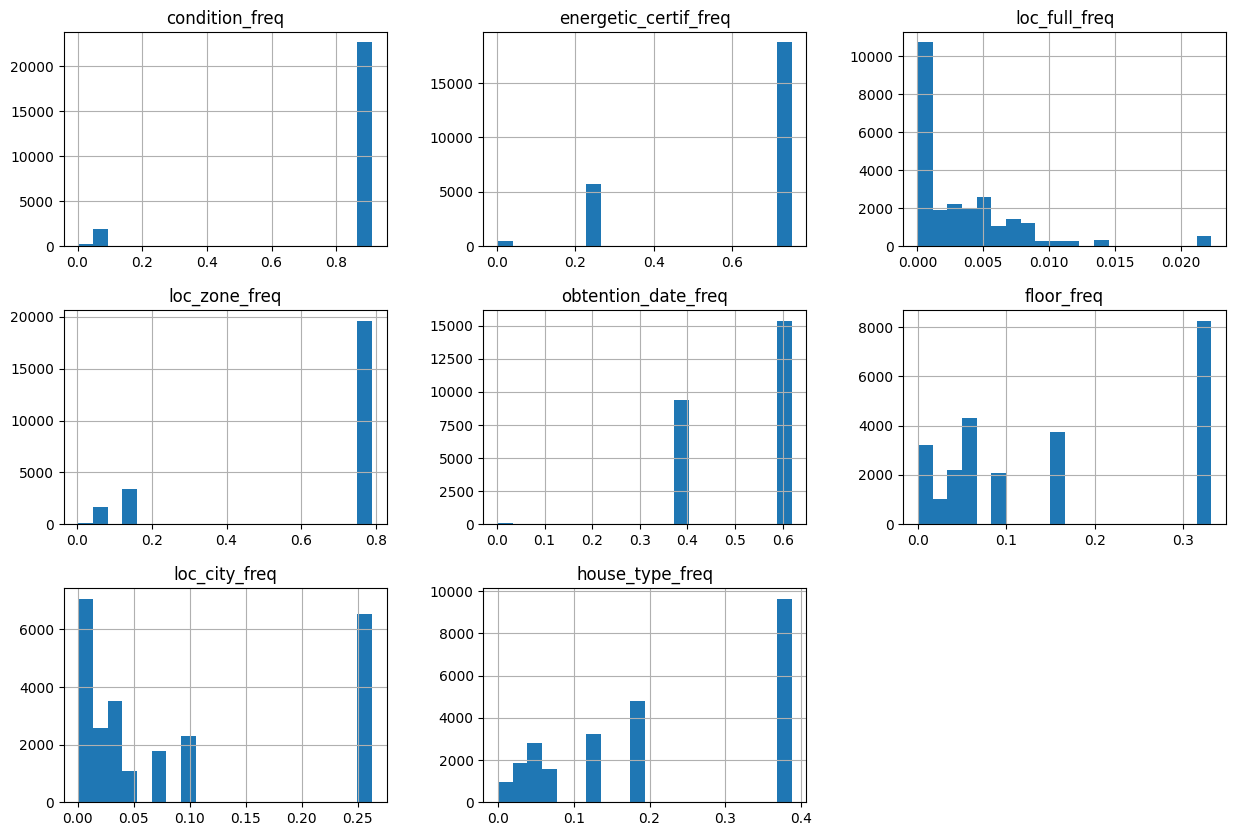

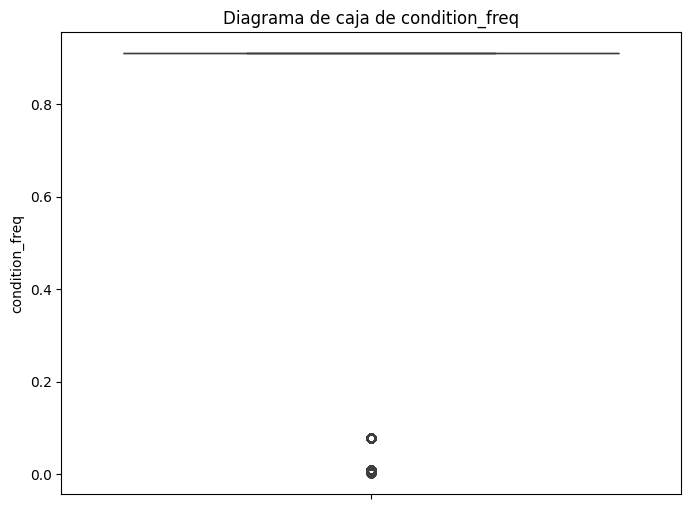

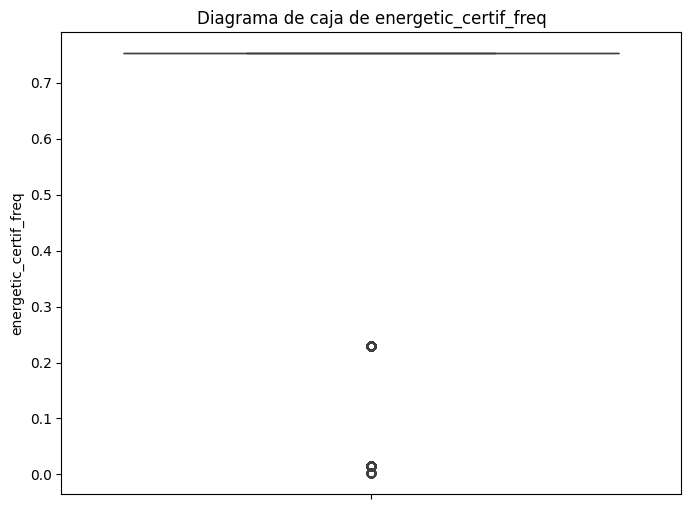

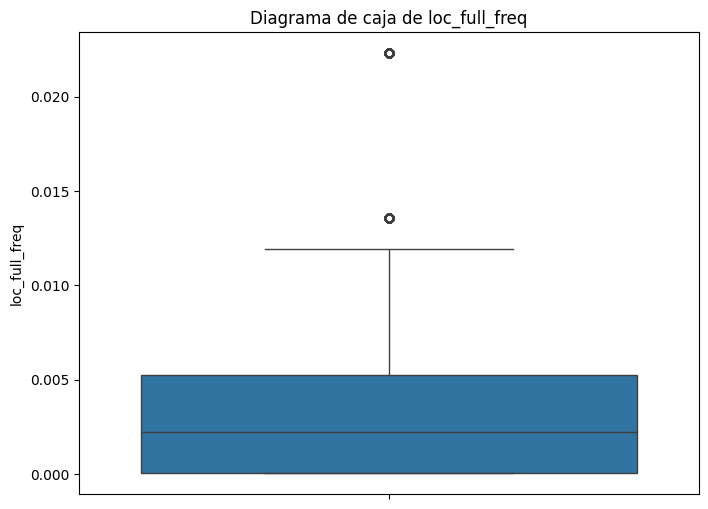

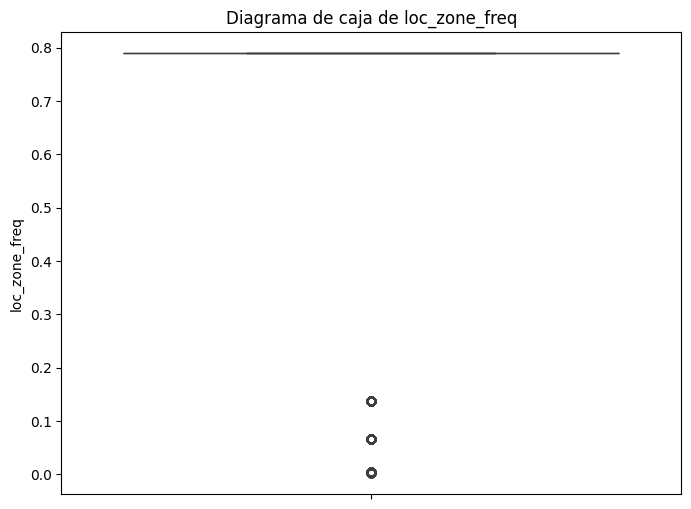

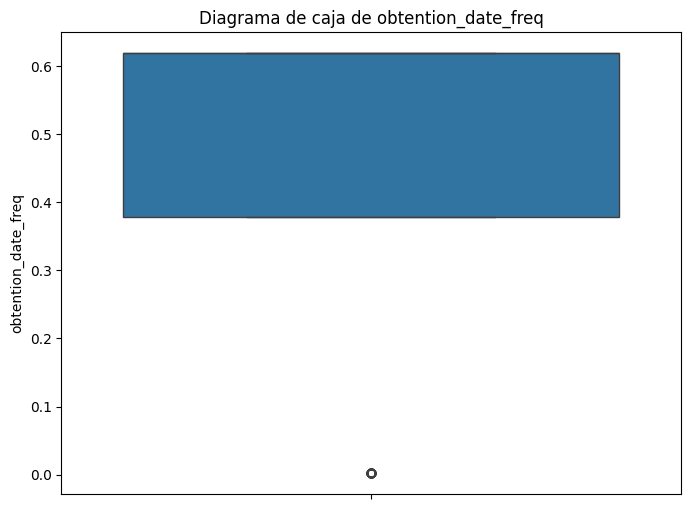

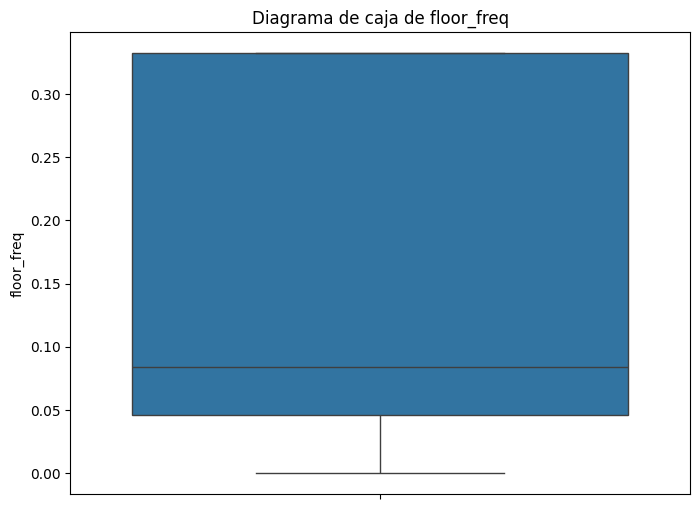

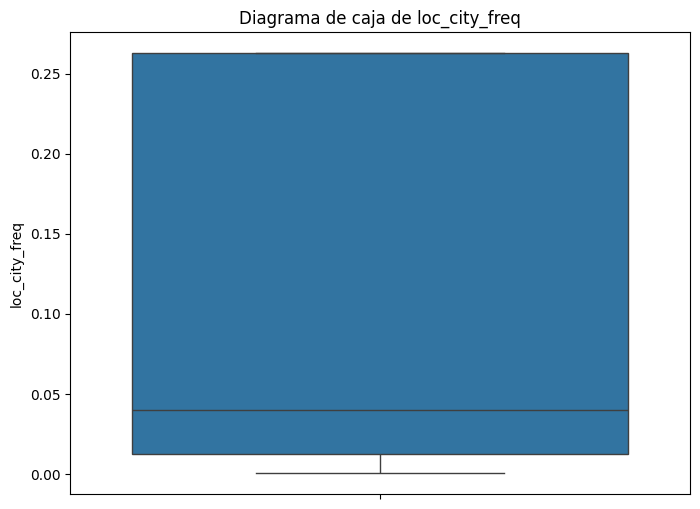

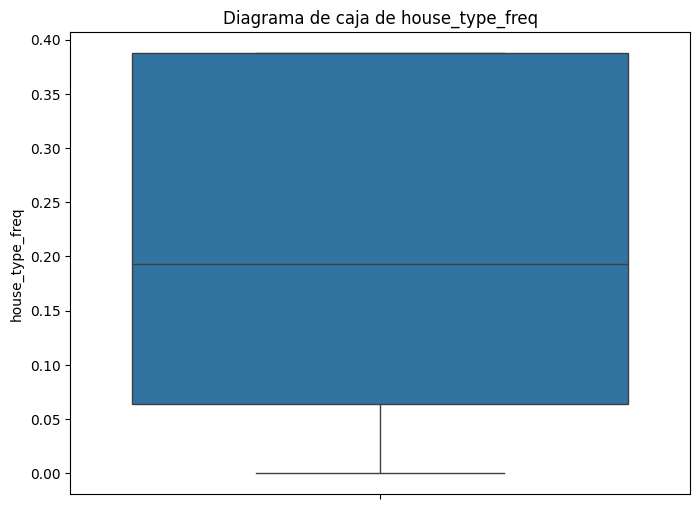

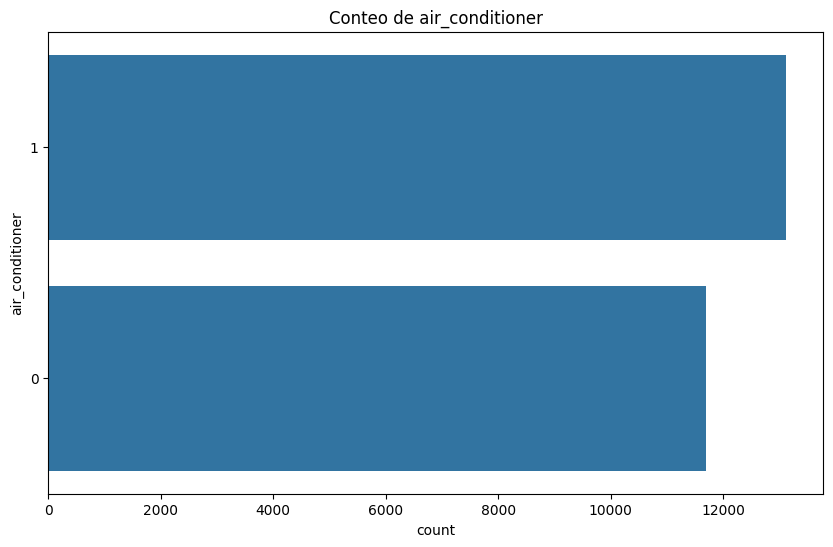

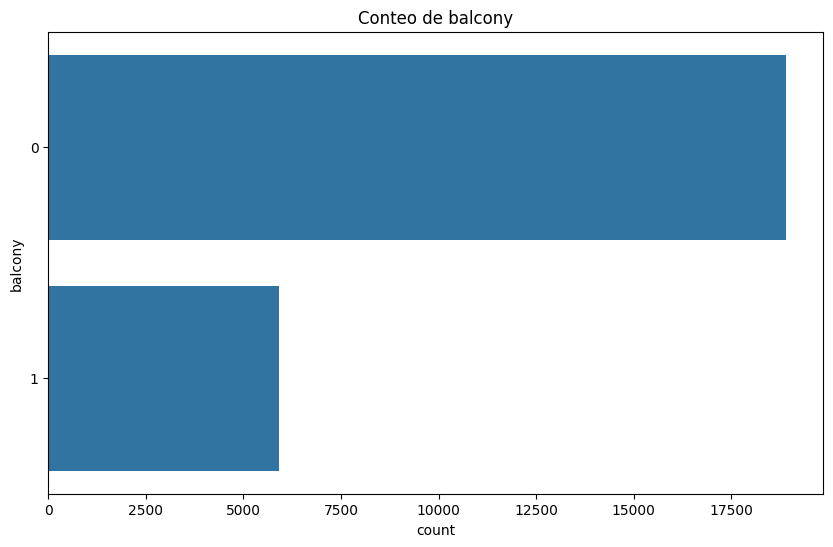

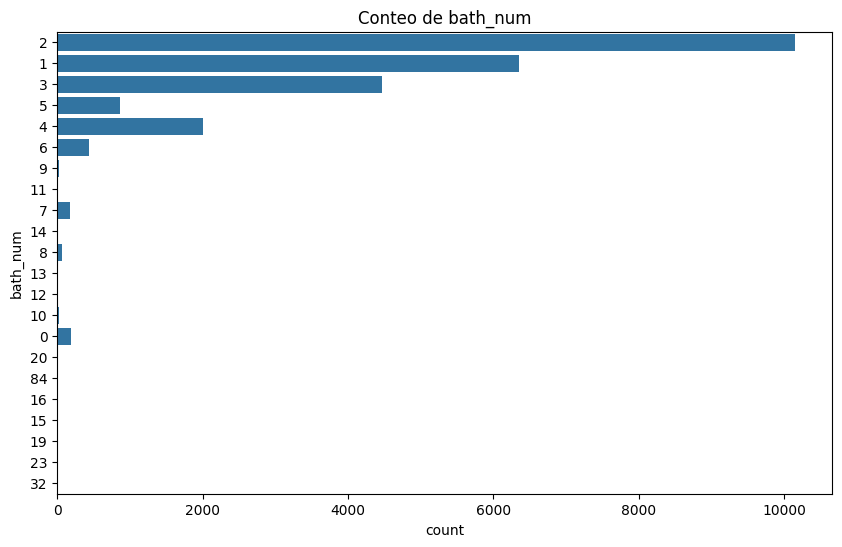

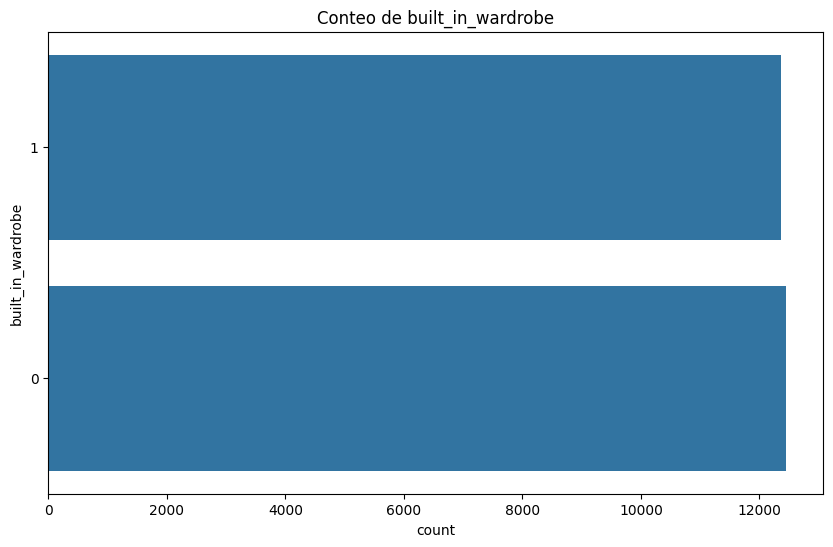

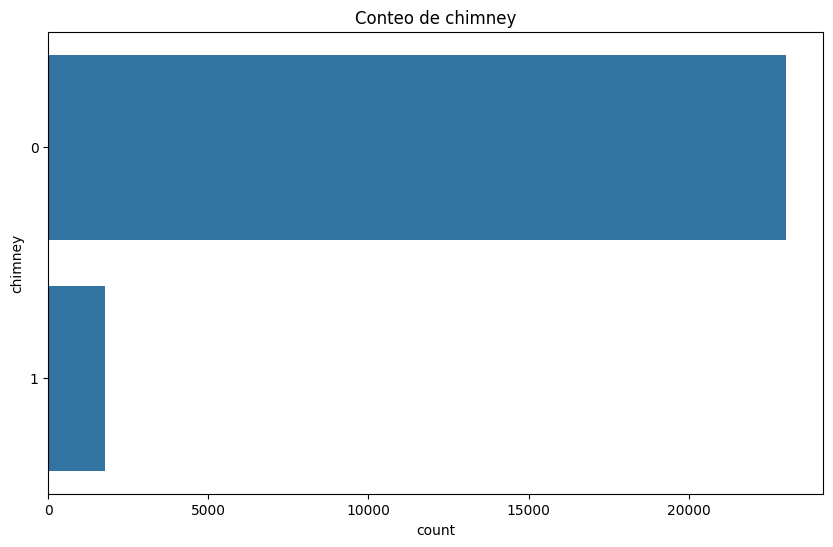

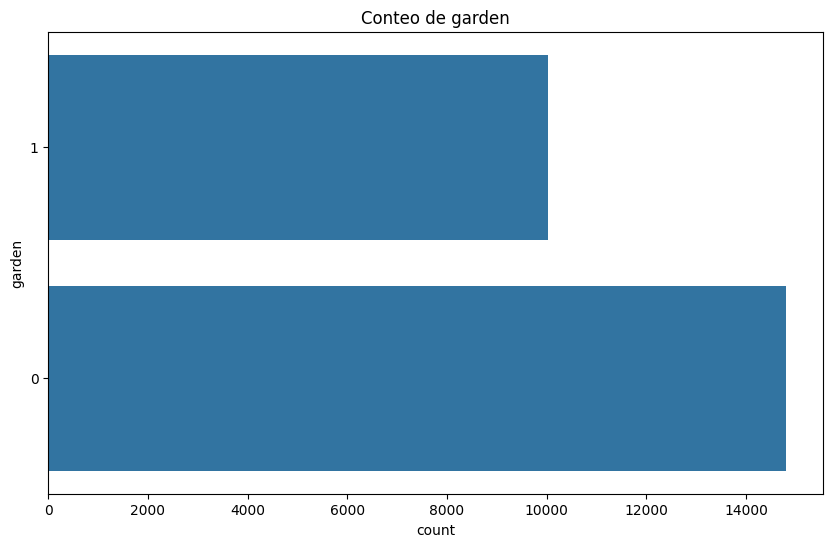

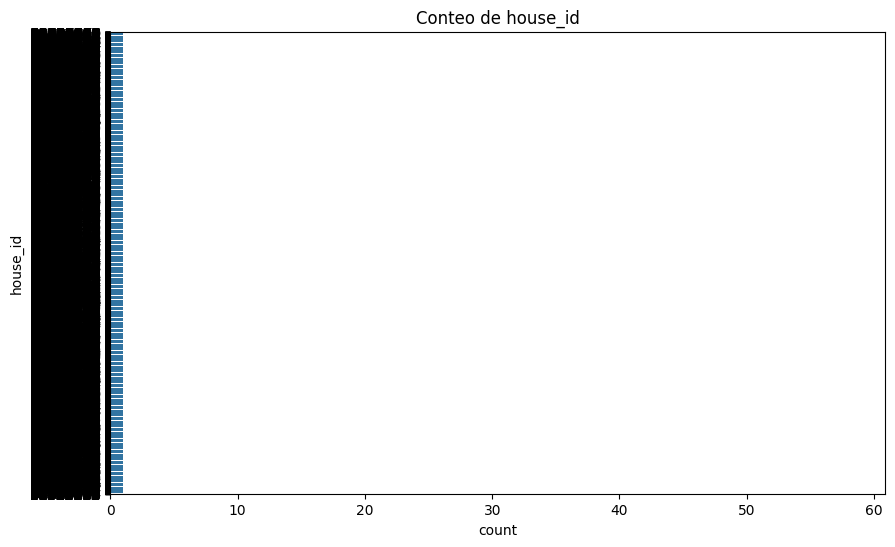

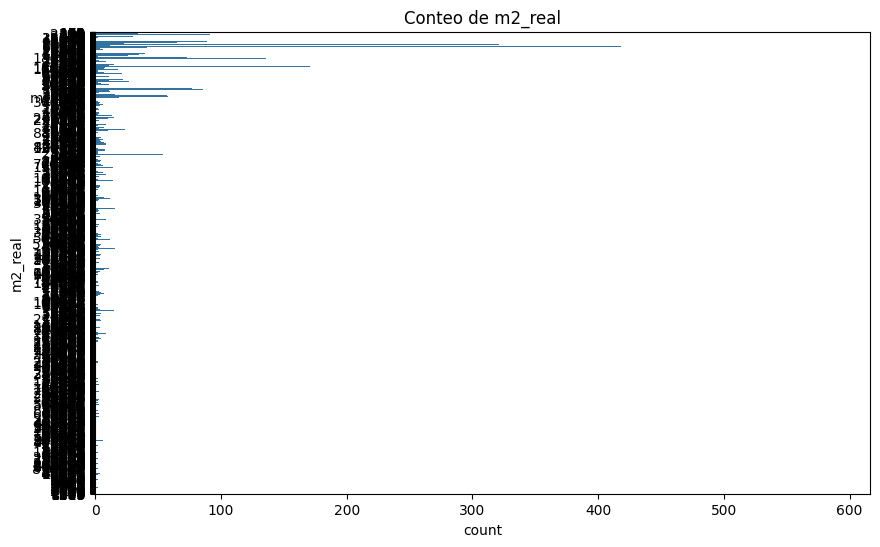

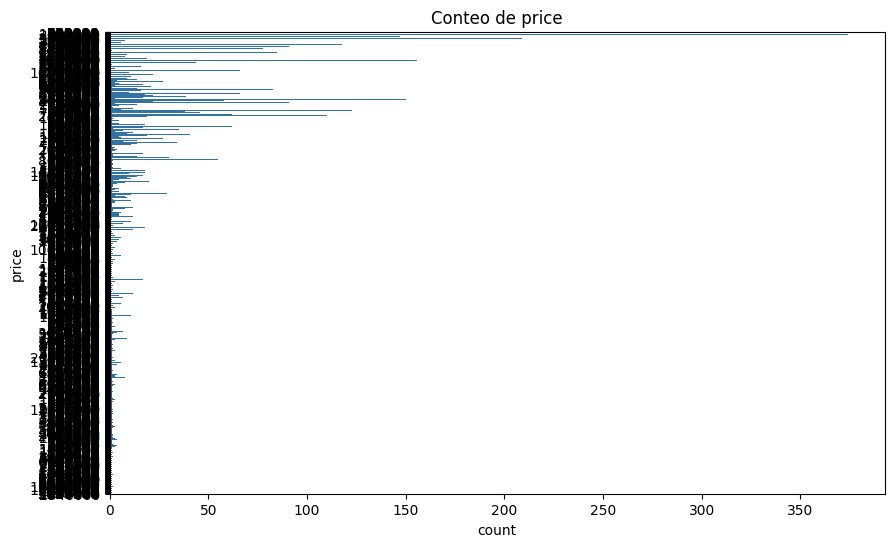

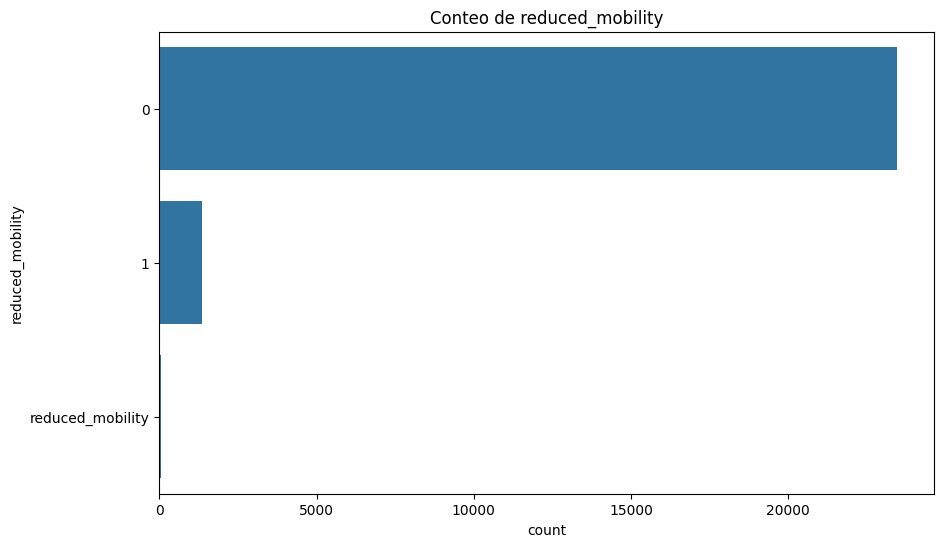

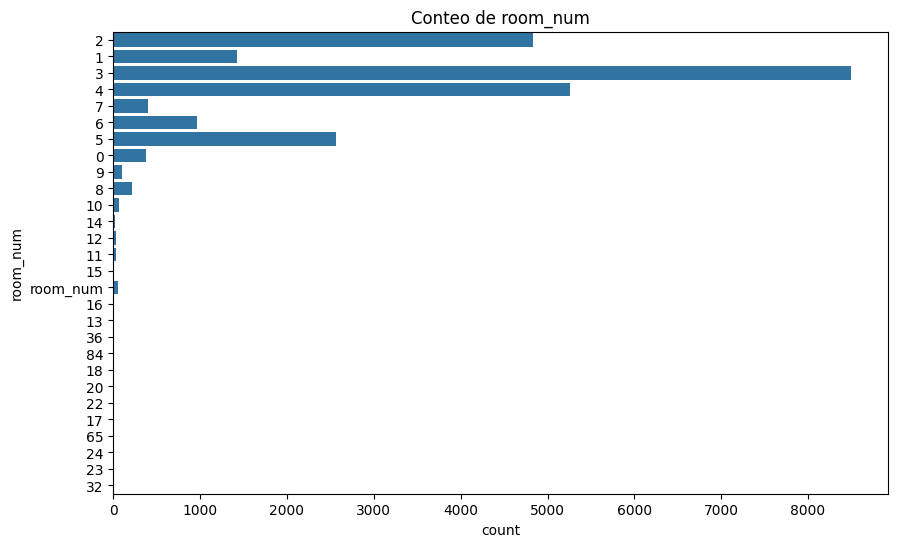

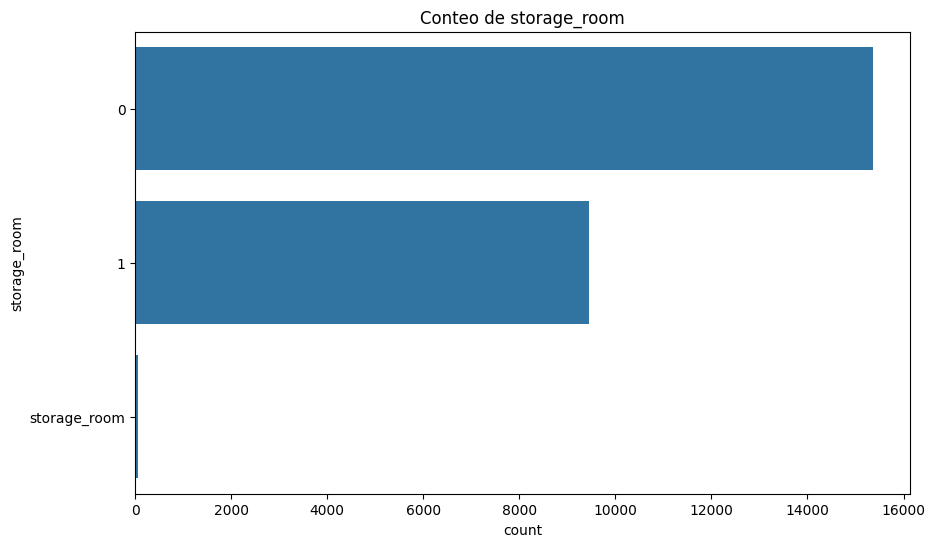

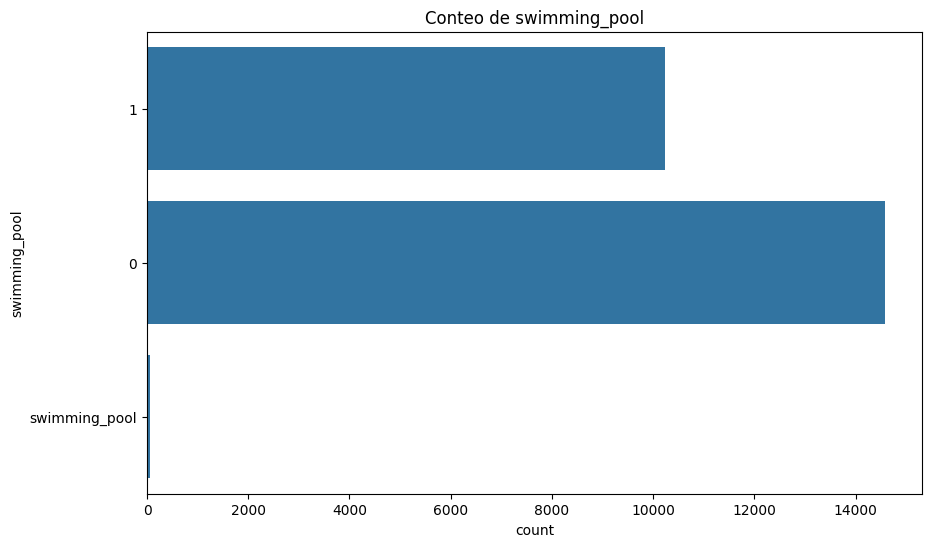

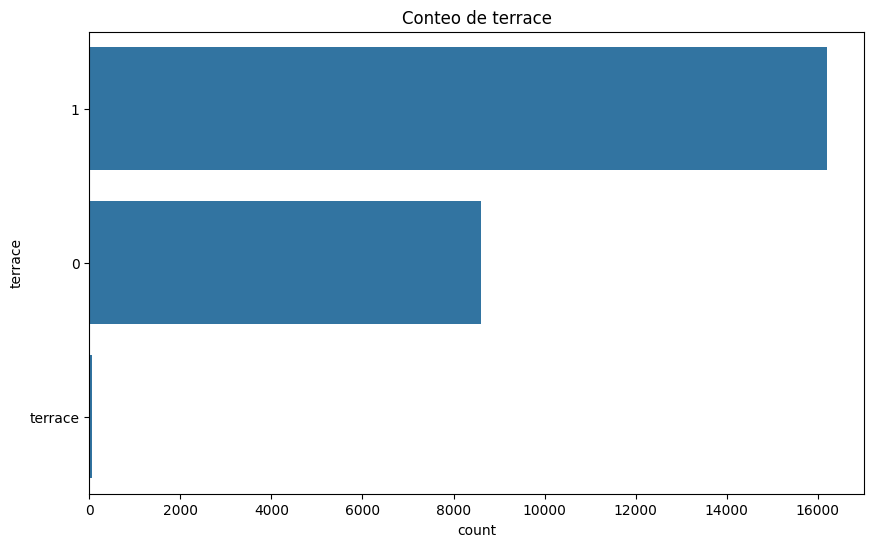

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Histograma para todas las variables numéricas
df_baleares.hist(bins=20, figsize=(15, 10))
plt.show()

# Diagramas de caja para todas las variables numéricas
numeric_columns = df_baleares.select_dtypes(include=['number']).columns

for column in numeric_columns:
    plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
    sns.boxplot(y=df_baleares[column])
    plt.title(f'Diagrama de caja de {column}')
    plt.show()

# Diagramas de barras para las variables categoricas
categorical_columns = df_baleares.select_dtypes(exclude=['number']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df_baleares[column])
    plt.title(f'Conteo de {column}')
    plt.show()

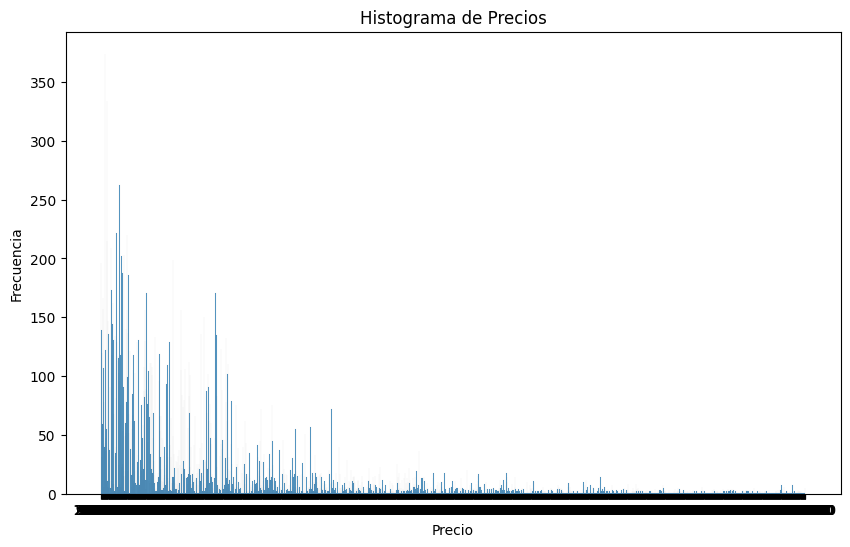

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_baleares['price'], bins=30, kde=False)  # Ajusta 'bins' según sea necesario
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

Matriz de correlación

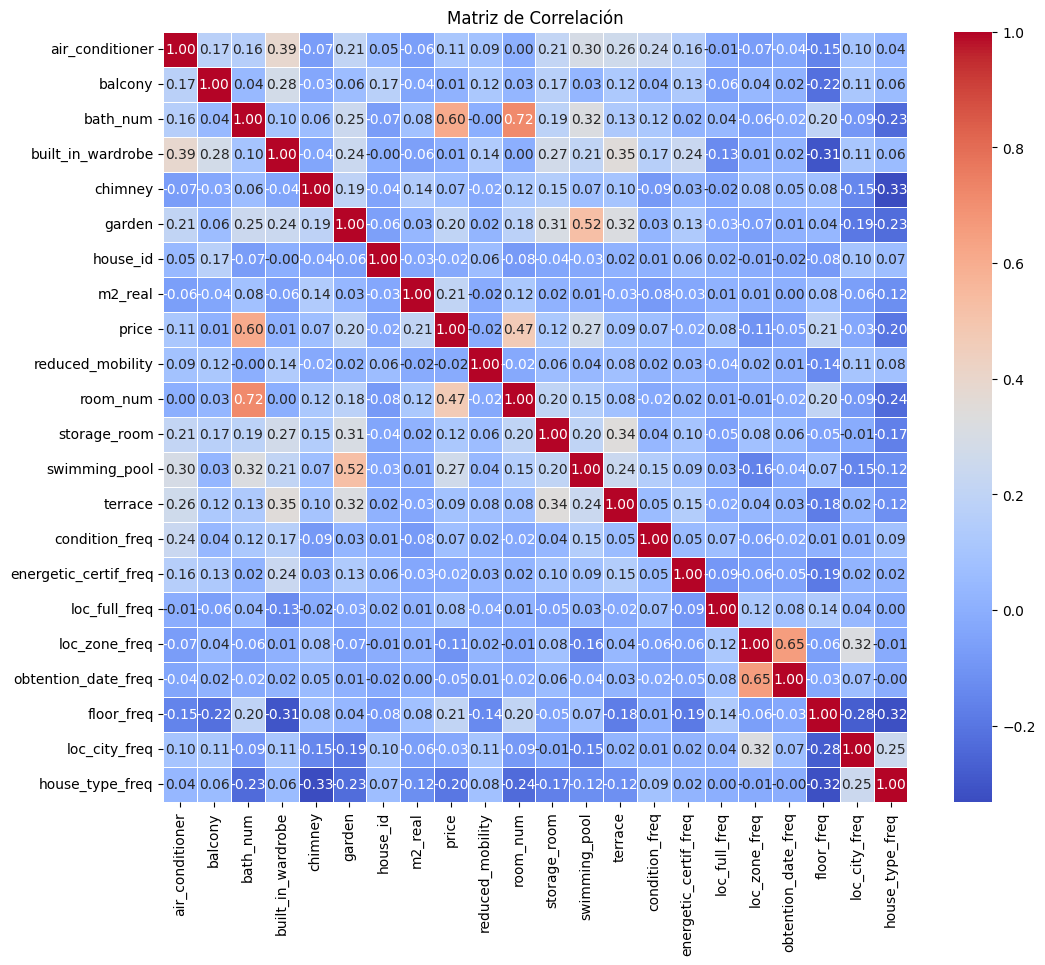

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama 'df'

# Calcular la matriz de correlación
correlation_matrix = df_baleares.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

## 2 Entrenar modelo

### 2.1 Cargar modelo transformado

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df_baleares = pd.read_csv('/content/drive/My Drive/Estudios/MasterIA/IAGen/baleares_transformado.csv')
display(df_baleares)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,house_id,m2_real,price,reduced_mobility,...,swimming_pool,terrace,condition_freq,energetic_certif_freq,loc_full_freq,loc_zone_freq,obtention_date_freq,floor_freq,loc_city_freq,house_type_freq
0,1,0,2,1,0,1,36266563,150,550000,0,...,1,1,0.909807,0.752814,0.000040,0.137540,0.378818,0.042926,0.039670,0.023151
1,1,0,1,1,0,0,38223244,55,240000,0,...,0,0,0.909807,0.752814,0.000040,0.137540,0.378818,0.005707,0.039670,0.387661
2,0,0,2,0,0,0,81803540,130,775000,0,...,0,1,0.909807,0.228899,0.000040,0.137540,0.378818,0.023915,0.039670,0.387661
3,0,0,1,1,0,1,81380167,70,300000,0,...,0,1,0.909807,0.752814,0.000040,0.137540,0.378818,0.005707,0.039670,0.387661
4,1,1,2,1,0,1,82243761,150,485000,0,...,1,1,0.909807,0.752814,0.000040,0.137540,0.378818,0.062862,0.039670,0.023151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24817,0,0,1,1,0,0,40373357,72,219000,0,...,1,1,0.909807,0.752814,0.000281,0.789751,0.618850,0.042926,0.092323,0.387661
24818,1,1,5,1,0,1,84739736,750,12000000,0,...,1,1,0.909807,0.752814,0.003336,0.789751,0.618850,0.046061,0.092323,0.192966
24819,1,0,1,1,0,1,81752747,79,390000,0,...,1,1,0.909807,0.752814,0.000040,0.789751,0.618850,0.058079,0.092323,0.054944
24820,0,0,3,1,0,1,81368953,733,1950000,0,...,1,1,0.909807,0.752814,0.003336,0.789751,0.618850,0.332195,0.092323,0.192966


### 2.2 Transformaciones extra

In [ ]:
import pandas as pd

# Asumiendo que tu DataFrame se llama df_baleares
# y que ya lo has cargado previamente

indices_a_eliminar = [1083, 20484]

df_baleares = df_baleares.drop(indices_a_eliminar)

# Reinicia los índices del DataFrame después de eliminar las filas
df_baleares = df_baleares.reset_index(drop=True)

# Opcional: Imprime el DataFrame resultante para verificar
print(df_baleares)

       air_conditioner  balcony  bath_num  built_in_wardrobe  chimney  garden  \
0                    1        0         2                  1        0       1   
1                    1        0         1                  1        0       0   
2                    0        0         2                  0        0       0   
3                    0        0         1                  1        0       1   
4                    1        1         2                  1        0       1   
...                ...      ...       ...                ...      ...     ...   
24815                0        0         1                  1        0       0   
24816                1        1         5                  1        0       1   
24817                1        0         1                  1        0       1   
24818                0        0         3                  1        0       1   
24819                0        0         3                  1        0       1   

       house_id  m2_real   

In [ ]:
import numpy as np

# Aplicar la transformación logarítmica (log1p)
df_baleares['price_log'] = np.log1p(df_baleares['price'])


In [ ]:
print(df_baleares.columns.tolist())

['air_conditioner', 'balcony', 'bath_num', 'built_in_wardrobe', 'chimney', 'garden', 'house_id', 'm2_real', 'price', 'reduced_mobility', 'room_num', 'storage_room', 'swimming_pool', 'terrace', 'condition_freq', 'energetic_certif_freq', 'loc_full_freq', 'loc_zone_freq', 'obtention_date_freq', 'floor_freq', 'loc_city_freq', 'house_type_freq', 'price_log']


In [ ]:
import pandas as pd

# Asumiendo que df_baleares ya está definido

# Eliminar la columna house_id
df_baleares = df_baleares.drop('house_id', axis=1)
#df_baleares = df_baleares.drop('price', axis=1)

# Verificar que la columna se ha eliminado (opcional)
print(df_baleares.columns)

Index(['air_conditioner', 'balcony', 'bath_num', 'built_in_wardrobe',
       'chimney', 'garden', 'm2_real', 'reduced_mobility', 'room_num',
       'storage_room', 'swimming_pool', 'terrace', 'condition_freq',
       'energetic_certif_freq', 'loc_full_freq', 'loc_zone_freq',
       'obtention_date_freq', 'floor_freq', 'loc_city_freq', 'house_type_freq',
       'price_log'],
      dtype='object')


Borrar valores atipicos

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def eliminar_atipicos_zscore(df_baleares, umbral=3):
    """Elimina las filas con valores atípicos usando z-score."""
    columnas_numericas = df_baleares.select_dtypes(include=np.number).columns
    filas_a_eliminar = set()  # Usamos un conjunto para evitar duplicados

    for columna in columnas_numericas:
        z_scores = np.abs(stats.zscore(df_baleares[columna]))
        indices_atipicos = df_baleares[z_scores > umbral].index
        filas_a_eliminar.update(indices_atipicos)

    df_baleares = df_baleares.drop(list(filas_a_eliminar))
    df_baleares = df_baleares.reset_index(drop=True)  # Resetear el índice
    return df_baleares

# Ejemplo de uso
df_baleares_limpio = eliminar_atipicos_zscore(df_baleares)

print("Filas con valores atípicos eliminadas.")

Filas con valores atípicos eliminadas.


In [ ]:
from sklearn.preprocessing import StandardScaler , RobustScaler
import joblib

# Separar características y target
X = df_baleares.drop('price_log', axis=1)
y = df_baleares['price_log'].values.reshape(-1, 1)

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Eliminar outliers usando IQR (solo en el conjunto de entrenamiento)
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
mask = ~((X_train < (Q1 - 1.5 * IQR)) | (X_train > (Q3 + 1.5 * IQR))).any(axis=1)
X_train = X_train[mask]
y_train = y_train[mask]

# Escalado (después de la división train-test)
scaler_X = RobustScaler()
scaler_y = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

#Guardar Escaladores
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

### 2.3 Division Train-Test

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function

# Separar características y target
X = df_baleares.drop('price_log', axis=1)
y = df_baleares['price_log'].values.reshape(-1, 1)

# División train-test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# División train-validation (60% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

### 2.4 Arquitectura del modelo

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Crear el modelo
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 2.5 Compilar y entrenar **modelo**

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

# Cargar los escaladores guardados
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.mse,
    metrics=["mse"]
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo con early stopping (usando datos escalados)
history = model.fit(X_train_scaled, y_train_scaled, epochs=1000, batch_size=32, verbose=0, validation_data=(X_val_scaled, y_val_scaled), callbacks=[early_stopping])

# Obtener las predicciones del modelo para el conjunto de prueba (en escala normalizada)
y_pred_scaled = model.predict(X_test_scaled)

# Desnormalizar las predicciones
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Desnormalizar los valores reales de y_test
y_test_desnormalized = scaler_y.inverse_transform(y_test_scaled)

mae = mean_absolute_error(y_test_desnormalized, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_desnormalized, y_pred))
r2 = r2_score(y_test_desnormalized, y_pred)

# Calcular el rango de y desnormalizado (CORREGIDO)
y_range = y_test_desnormalized.max() - y_test_desnormalized.min()

# Calcular RMSE y MAE en porcentaje del rango de y
rmse_percent = (rmse / y_range) * 100
mae_percent = (mae / y_range) * 100

# Calcular R² en porcentaje
r2_percent = r2 * 100

# Imprimir los resultados en porcentaje
print(f"RMSE (% del rango de y): {rmse_percent:.2f}%")
print(f"MAE (% del rango de y): {mae_percent:.2f}%")
print(f"R²: {r2_percent:.2f}%")

# 11. Imprimir algunas predicciones y valores reales para inspección (en escala de potencia de 10)
print("\nPredicciones vs. Valores Reales (Precios en Potencia de 10):")
for i in range(10):
    prediccion_potencia_10 = 10**(y_pred[i][0] / np.log(10))
    real_potencia_10 = 10**(y_test_desnormalized[i][0] / np.log(10))
    print(f"Predicción: {prediccion_potencia_10:.2f}, Real: {real_potencia_10:.2f}")

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE (% del rango de y): 30.05%
MAE (% del rango de y): 9.98%
R²: -253.19%

Predicciones vs. Valores Reales (Precios en Potencia de 10):
Predicción: 665470.04, Real: 1750001.00
Predicción: 1074944.12, Real: 550001.00
Predicción: 281771.83, Real: 525001.00
Predicción: 781990.01, Real: 1000001.00
Predicción: 461206.07, Real: 424001.00
Predicción: 141657672973595.75, Real: 490001.00
Predicción: 233252.90, Real: 127501.00
Predicción: 424865.11, Real: 456001.00
Predicción: 323531.20, Real: 350001.00
Predicción: 1606822.48, Real: 360001.00


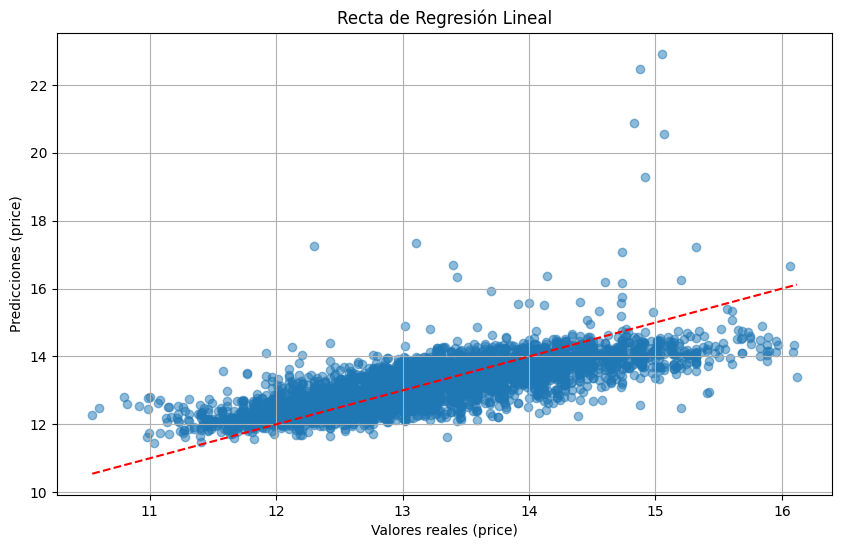

In [ ]:
import matplotlib.pyplot as plt

# Graficar la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(y_test_desnormalized, y_pred, alpha=0.5)  # Scatter plot de valores reales vs. predicciones
plt.plot([y_test_desnormalized.min(), y_test_desnormalized.max()], [y_test_desnormalized.min(), y_test_desnormalized.max()], 'r--')  # Línea de identidad
plt.xlabel("Valores reales (price)")
plt.ylabel("Predicciones (price)")
plt.title("Recta de Regresión Lineal")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

# Asumiendo que tu DataFrame se llama df_baleares
# y que ya lo has cargado previamente

df_baleares_ordenado = df_baleares.sort_values(by='price_log')

display(df_baleares_ordenado)

,air_conditioner,balcony,bath_num,built_in_wardrobe,chimney,garden,m2_real,reduced_mobility,room_num,storage_room,...,terrace,condition_freq,energetic_certif_freq,loc_full_freq,loc_zone_freq,obtention_date_freq,floor_freq,loc_city_freq,house_type_freq,price_log
21928,0,0,1,0,0,0,7500,0,1,0,...,0,0.078899,0.752814,0.000040,0.789751,0.618850,0.332195,0.002693,0.016921,10.463132
18065,0,0,1,0,0,0,6000,0,2,0,...,0,0.909807,0.752814,0.003698,0.789751,0.618850,0.332195,0.005346,0.063706,10.515994
20340,0,0,1,0,0,0,1300,0,1,0,...,0,0.909807,0.228899,0.004984,0.789751,0.618850,0.332195,0.016238,0.063706,10.545368
16633,0,0,1,0,0,0,67,0,3,0,...,0,0.909807,0.015957,0.001407,0.789751,0.618850,0.332195,0.022307,0.387661,10.555839
6828,0,0,1,0,0,0,1069,0,1,0,...,0,0.078899,0.752814,0.000040,0.789751,0.378818,0.058079,0.011174,0.063706,10.571343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,0,0,7,0,0,1,1291,0,6,0,...,0,0.909807,0.228899,0.003658,0.137540,0.378818,0.332195,0.038023,0.129863,16.489659
5240,1,1,10,1,0,1,23750,0,8,1,...,1,0.909807,0.752814,0.000040,0.789751,0.378818,0.046061,0.005265,0.192966,16.588099
2778,0,0,2,0,0,0,20000,0,7,0,...,0,0.909807,0.228899,0.001849,0.137540,0.378818,0.150764,0.038023,0.129863,16.600522
12572,0,0,4,0,0,0,300,0,6,0,...,1,0.909807,0.228899,0.000040,0.789751,0.618850,0.052492,0.262781,0.387661,16.811243


### 2.6 Guardar Modelo

In [ ]:
# Después de entrenar tu modelo (model_tierras.fit(...))

# Guardar el modelo completo en un archivo llamado 'modelo_baleares95R2.h5'
model.save('modelo_baleares61R2.h5')

### 2.7 Cargar Modelo

In [ ]:
import tensorflow as tf
from google.colab import drive

drive.mount('/content/drive')

ruta_modelo = '/content/drive/My Drive/Estudios/MasterIA/IAGen/Modelos/modelo_baleares61R2.h5'


# Cargar el modelo
modelo_cargado = tf.keras.models.load_model(ruta_modelo)

# (Opcional) Verificar que el modelo se cargó correctamente
modelo_cargado.summary()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,643 (190.02 KB)

 Trainable params: 48,641 (190.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

try:

    df_baleares = pd.read_csv('/content/drive/My Drive/Estudios/MasterIA/IAGen/baleares_transformado.csv')

    # Imprimir la fila número 9 (índice 9)
    print(df_baleares.iloc[9])

except FileNotFoundError:
    print(f"Error: No se pudo encontrar el archivo '{df_baleares}'.")
except Exception as e:
    print(f"Ocurrió un error: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
air_conditioner          1.000000e+00
balcony                  0.000000e+00
bath_num                 2.000000e+00
built_in_wardrobe        0.000000e+00
chimney                  0.000000e+00
garden                   0.000000e+00
house_id                 8.151186e+07
m2_real                  1.400000e+02
price                    4.570000e+05
reduced_mobility         0.000000e+00
room_num                 3.000000e+00
storage_room             0.000000e+00
swimming_pool            1.000000e+00
terrace                  0.000000e+00
condition_freq           9.098071e-01
energetic_certif_freq    2.288987e-01
loc_full_freq            7.114148e-03
loc_zone_freq            1.375402e-01
obtention_date_freq      3.788183e-01
floor_freq               3.321945e-01
loc_city_freq            3.967042e-02
house_type_freq          3.876608e-01
Name: 9, dtype: float64


## 3 Probar Modelo

In [ ]:
import tensorflow as tf
import joblib
import numpy as np

# 1. Cargar el modelo guardado
modelo_cargado = tf.keras.models.load_model('modelo_baleares61R2.h5')  # Reemplaza 'tu_modelo.h5'

# 2. Cargar los escaladores guardados
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

# 3. Crear datos de ejemplo para probar el modelo (20 características)
# Asegúrate de que el orden de las características coincida con el orden de entrenamiento
datos_prueba = np.array([[1.000000e+00, 0.000000e+00, 2.000000e+00, 0.000000e+00,
                        0.000000e+00, 0.000000e+00, 1.400000e+02, 0.000000e+00,
                        3.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
                        9.098071e-01, 2.288987e-01, 7.114148e-03, 1.375402e-01,
                        3.788183e-01, 3.321945e-01, 3.967042e-02, 3.876608e-01]])

# 4. Escalar los datos de prueba
datos_prueba_escalados = scaler_X.transform(datos_prueba)

# 5. Realizar predicciones con el modelo cargado
predicciones_escaladas = modelo_cargado.predict(datos_prueba_escalados)

# 6. Desnormalizar las predicciones
predicciones = scaler_y.inverse_transform(predicciones_escaladas)

# 8. Transformar predicciones de log a escala original
predicciones_original = np.expm1(predicciones)

print("\nPredicciones (price):")
print(predicciones_original)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step

Predicciones (price):
[[365120.8]]
